In [303]:
import xara
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [22]:
[file for file in os.listdir(xara.__path__[0]) if "txt" in file]

['tmt.txt',
 'subaru_asym.txt',
 'hst.txt',
 'palomar_med_cross.txt',
 'golay9.txt']

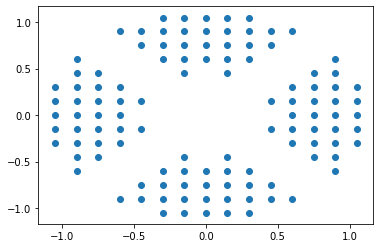

In [23]:
hst_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "hst.txt"))
plt.scatter(hst_virtual_aperture[:, 0], hst_virtual_aperture[:, 1])

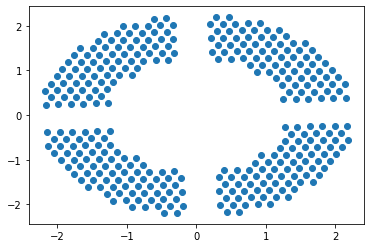

In [24]:
palomar_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "palomar_med_cross.txt"))
plt.scatter(palomar_virtual_aperture[:, 0], palomar_virtual_aperture[:, 1])

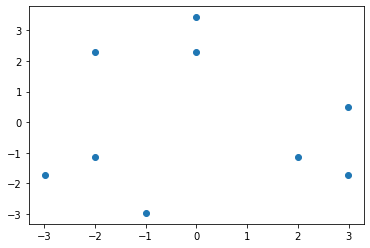

In [25]:
golay_mask = np.loadtxt(os.path.join(xara.__path__[0], "golay9.txt"))
plt.scatter(golay_mask[:, 0], golay_mask[:, 1])

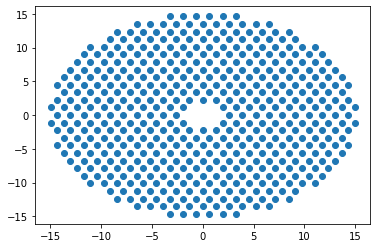

In [26]:
#thirty meter telescope
tmt_virtual_aperture = np.loadtxt(os.path.join(xara.__path__[0], "tmt.txt"))
plt.scatter(tmt_virtual_aperture[:, 0], tmt_virtual_aperture[:, 1])

In [222]:
cwavel = 0.5e-6 # Wavelength [m]
ISZ = 128# Array size (number of pixel on a side)
pscale = 0.1 # plate scale [mas/pixel]
m2pix = xara.core.mas2rad(pscale) * ISZ / cwavel  # [1/m] units for (u, v) Fourier space
m2pix

0.12411230236404125

In [38]:
kpi = xara.KPI(array=golay_mask)

Attempting to build KPI from array None
36 distinct baselines were identified
10 first singular values for this array:
[3. 3. 3. 3. 3. 3. 3. 1.]

        Summary of properties for no_name
        ---------------------------------------------------------------
        -   9 sub-apertures
        -  36 distinct baselines
        -  28 Ker-phases (77.8 % target phase information recovery)
        -   8 Eig-phases (88.9 % wavefront information recovery)
        ---------------------------------------------------------------
        
KPI data successfully created


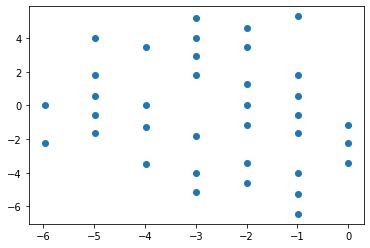

In [40]:
plt.scatter(kpi.UVC[:, 0], kpi.UVC[:, 1])

In [285]:
dft_matrix = xara.core.compute_DFTM1(kpi2.UVC, m2pix, ISZ, inv=False)
dft_matrix_i = xara.core.compute_DFTM1(kpi2.UVC, m2pix, ISZ, inv=True)

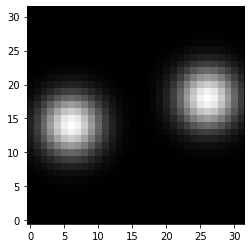

In [142]:
image_coords = np.arange(32) - 32 / 2.
xx, yy = np.meshgrid(image_coords, image_coords)
image = np.zeros_like(xx)
rho_squared = (xx - 10) ** 2 + (yy-2) ** 2
image += np.exp(-0.5 * (rho_squared / 3 ** 2))
rho_squared = (xx + 10) ** 2 + (yy+2) ** 2
image += np.exp(-0.5 * (rho_squared / 3 ** 2))
plt.imshow(image, cmap="gray")

array([40.6491075 , 35.70755634, 27.51268628, 25.12753912, 25.12753912,
       28.04426228, 40.99753912, 28.0204781 , 17.46466362, 15.87002504,
       27.77252504, 35.70751408, 25.12751408, 12.30436117, 12.17423725,
       17.64142925, 25.12751408, 35.70751408, 25.12750626, 15.87000626,
        5.29000626,  3.96750626,  5.56214484, 15.87000626, 25.12750626,
       42.43701665, 28.95259965, 17.19250156,  3.70764873,  1.32250156,
        1.32250156,  4.36934865, 28.95259965, 11.9025    ,  4.94155116,
        1.3225    ])

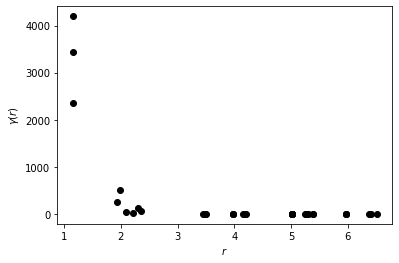

In [210]:
gamma = np.dot(np.ravel(image), dft_matrix.T) # Complex coherence function
amplitude = np.absolute(gamma)**2
phase = np.angle(gamma)
r = kpi.UVC[:, 0]**2 + kpi.UVC[:, 1]**2
plt.plot(r**(1/2), amplitude, 'ko')
plt.xlabel(r"$r$")
plt.ylabel(r"$\gamma(r)$")
r

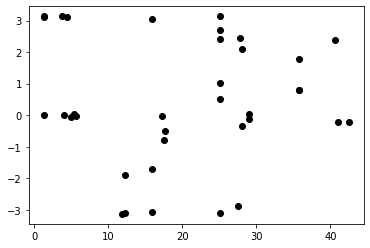

In [144]:
plt.plot(r, phase, "ko")

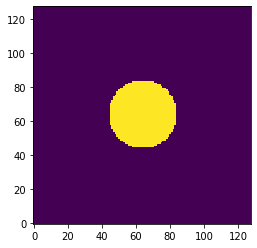

In [253]:
image_coords = np.arange(128) - 128 / 2.
xx, yy = np.meshgrid(image_coords, image_coords)
image2 = np.zeros_like(xx)
rho_squared = (xx) ** 2 + (yy) ** 2
image2 += rho_squared**(1/2) < 20
plt.imshow(image2)

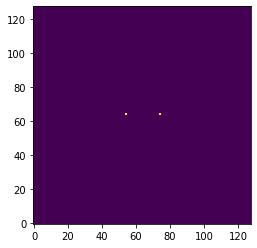

In [265]:
image3 = np.zeros_like(image)
rho1 = (xx - 10)**2 + (yy)**2
image3 += rho1 < 1
rho1 = (xx + 10)**2 + (yy)**2
image3 += rho1 < 1
plt.imshow(image3)

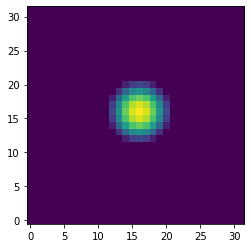

In [193]:
image4 = np.zeros_like(image)
rho =np.sqrt(rho_squared)
alpha = 10 # pixel
def limb_darkening_factor(rho, n):
    assert n <= 3
    ans = np.zeros_like(rho)
    radicand = 1 - 4*rho**2/100
    ans[np.where(radicand > 0)] += (1 - 4*rho[np.where(radicand > 0)]**2/100)**(n/2)
    return ans
image4 += (np.sqrt(rho) < 10) * limb_darkening_factor(rho, 3)  # limb darkening model
plt.imshow(image4)

array([8.71452621e-01, 1.15143942e+01, 5.54969293e+01, 2.07530191e+01,
       2.07530191e+01, 5.71605700e+01, 1.10241137e+01, 2.30774725e+01,
       2.55067217e+00, 3.93948312e+00, 2.44749258e+01, 3.39743819e+00,
       3.95617669e+01, 1.10411312e+02, 1.13999511e+02, 1.24822437e+00,
       3.95617669e+01, 3.39743819e+00, 7.22940112e+01, 6.96085252e+00,
       3.16075330e+00, 1.39381345e+02, 1.46897980e+01, 6.96085252e+00,
       7.22940112e+01, 1.75573256e+01, 1.66714505e+01, 8.84365850e-01,
       1.90563026e+02, 3.34122742e+03, 3.34122742e+03, 4.02887499e+01,
       1.66714505e+01, 7.86671007e+01, 6.04404310e+00, 3.36261587e+03])

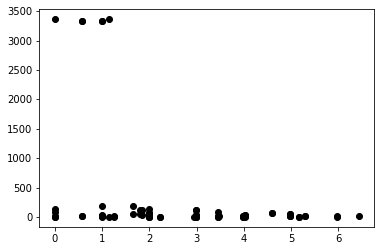

In [207]:
gamma2 = np.dot(np.ravel(image2), dft_matrix.T) # Complex coherence function
amplitude2 = np.absolute(gamma2)**2
phase2 = np.angle(gamma2)
r2 = np.sqrt(kpi.UVC[:, 0]**2 + kpi.UVC[:, 1]**2)
plt.plot(r2, amplitude2, 'ko')
amplitude2

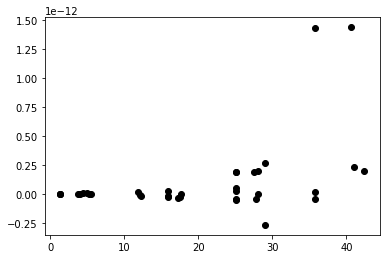

In [86]:
plt.plot(r2, phase2, 'ko')

(-120.04598754067266,
 103.69513709443103,
 -111.42699699442232,
 125.19782825650675)

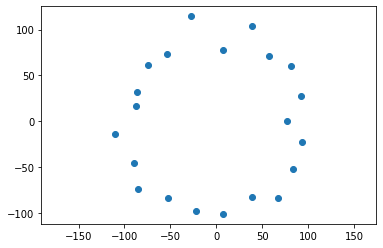

In [245]:
circle_mask = np.zeros((21, 2))
for i in range(21):
    circle_mask[i,0] = (100 + 10*np.random.normal())*np.cos(2*np.pi*i/21)
    circle_mask[i,1] = (100 + 10*np.random.normal())*np.sin(2*np.pi*i/21)
plt.scatter(circle_mask[:, 0], circle_mask[:, 1])
plt.axis("equal")

In [199]:
random_mask = np.random.normal(size=(9, 2))
random_mask

array([[ 0.97835977, -1.12686299],
       [ 0.2020417 , -0.8395246 ],
       [-0.02964843, -0.11145311],
       [-0.40022047,  1.02795257],
       [ 1.48031383,  1.39995424],
       [ 0.61099658,  0.90775785],
       [-0.24222606, -0.0672086 ],
       [-0.17949989,  0.87005502],
       [-0.65061909,  0.56395807]])

In [246]:
kpi2 = xara.KPI(array=circle_mask)

Attempting to build KPI from array None
210 distinct baselines were identified
10 first singular values for this array:
[4.58258 4.58258 4.58258 4.58258 4.58258 4.58258 4.58258 4.58258 4.58258
 4.58258]

        Summary of properties for no_name
        ---------------------------------------------------------------
        -  21 sub-apertures
        - 210 distinct baselines
        - 190 Ker-phases (90.5 % target phase information recovery)
        -  20 Eig-phases (95.2 % wavefront information recovery)
        ---------------------------------------------------------------
        
KPI data successfully created


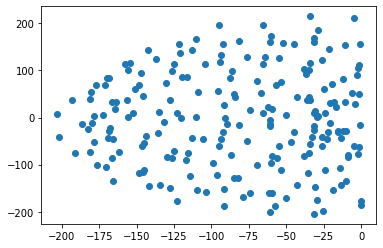

In [298]:
plt.scatter(kpi2.UVC[:, 0], kpi2.UVC[:, 1])

In [247]:
fft_matrix2 = xara.core.compute_DFTM1(kpi2.UVC, m2pix, ISZ)

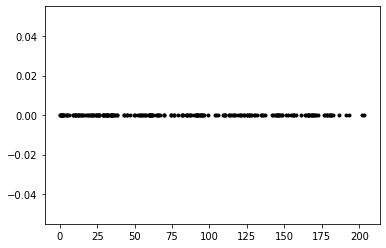

In [320]:
# There is an analytical solution for gamma in term of r only for circular star and limb darkening model
# For binary, the solution is in term of u (for point like star), in general the solution lies in the Fourier space gamma(u, v)
gamma3 = np.dot(fft_matrix2, np.ravel(image))
r2 = np.sqrt(kpi2.UVC[:, 0]**2 + kpi2.UVC[:, 1]**2)
plt.plot(np.abs(kpi2.UVC[:, 0]), np.angle(gamma3), "k.")

Text(0, 0.5, 'baseline')

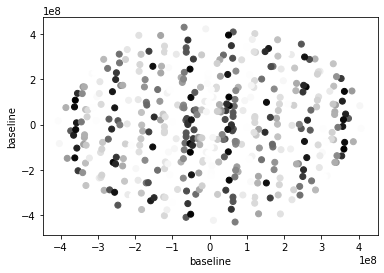

In [302]:
plt.scatter(kpi2.UVC[:, 0]/cwavel, kpi2.UVC[:, 1]/cwavel, c=np.absolute(gamma3), cmap="gray")
plt.scatter(-kpi2.UVC[:, 0]/cwavel, -kpi2.UVC[:, 1]/cwavel, c=np.absolute(gamma3), cmap="gray")
plt.xlabel("baseline")
plt.ylabel("baseline")

In [286]:
dirty_image = np.dot(gamma3, dft_matrix_i.T)

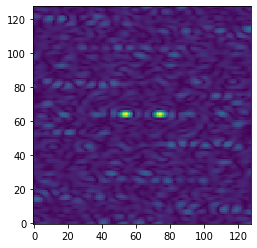

In [293]:
dirty_image = dirty_image.reshape((128, 128))
plt.imshow(np.absolute(dirty_image))

In [321]:
temp = tf.constant(dft_matrix, dtype=tf.complex128)
mag = tf.math.abs(temp)
angle = tf.math.angle(temp)
dft_matrix.shape

(210, 16384)

In [328]:
tf.math.real(temp)

<tf.Tensor: shape=(210, 16384), dtype=float64, numpy=
array([[ 0.77056116,  0.85356533, -0.21460743, ..., -0.98631779,
        -0.1653417 ,  0.87862558],
       [ 0.76118359,  0.86603496, -0.18101965, ..., -0.99550281,
        -0.42270754,  0.71232755],
       [-0.63237124, -0.95832068, -0.10495418, ...,  0.74554961,
        -0.32835177, -0.99818124],
       ...,
       [-0.64558575, -0.64131335, -0.63702098, ..., -0.99781819,
        -0.99743417, -0.99701907],
       [ 0.9229805 ,  0.92335321,  0.92372505, ...,  0.76933777,
         0.76995682,  0.77057515],
       [-0.85848655, -0.85896176, -0.85943623, ..., -0.82488744,
        -0.82541131, -0.82593448]])>

In [346]:
test = temp + 1j + 5
sigma = 0.1
Amatrix = dft_matrix
vis = gamma3
imvec = tf.constant(np.ravel(image3), dtype=tf.complex128)
adjoint = tf.transpose(tf.math.conj(Amatrix))
print(adjoint.shape)
print(Amatrix.shape)
print(imvec.shape)
samples = tf.tensordot(Amatrix, imvec, axes=1)
print(samples.shape)


(16384, 210)
(210, 16384)
(16384,)
(210,)


In [350]:
tf.tensordot(adjoint, gamma3, axes=1)

<tf.Tensor: shape=(16384,), dtype=complex128, numpy=array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])>